# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
!pip install citipy

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


In [10]:
cities

['port-aux-francais',
 'thunder bay',
 'murzuq',
 'papao',
 'bredasdorp',
 'adamstown',
 "la'ie",
 'palikir - national government center',
 'olyokminsk',
 'tabina',
 'riosucio',
 'edinburgh of the seven seas',
 'blackmans bay',
 'port moresby',
 'invercargill',
 'meizhou',
 'ushuaia',
 'coquimbo',
 'yellowknife',
 'jamestown',
 'nantucket',
 'vorgashor',
 'beidaihehaibin',
 'cidreira',
 'waitangi',
 'vila franca do campo',
 'stanley',
 'palmas',
 'port elizabeth',
 'codrington',
 'bria',
 'sur',
 'puerto natales',
 'longyearbyen',
 'kalmunai',
 'college',
 'afaahiti',
 'puerto ayora',
 'ilulissat',
 'newman',
 'carnarvon',
 'bethel',
 'andergrove',
 'isla vista',
 'port mathurin',
 'grytviken',
 'calvinia',
 'prince rupert',
 'qamdo',
 'sarospatak',
 'mountain home',
 'fort st. john',
 'dwarka',
 'cururupu',
 'whitehorse',
 'mawlaik',
 'sidney',
 'tofol',
 'iringal',
 'san luis de la loma',
 'dudinka',
 'avarua',
 'hawaiian paradise park',
 'saldanha',
 'ancud',
 "ust'-kut",
 'praia da

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | thunder bay
Processing Record 3 of Set 1 | murzuq
Processing Record 4 of Set 1 | papao
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | la'ie
Processing Record 8 of Set 1 | palikir - national government center
Processing Record 9 of Set 1 | olyokminsk
Processing Record 10 of Set 1 | tabina
Processing Record 11 of Set 1 | riosucio
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | port moresby
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | meizhou
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | coquimbo
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | nantucket
Processing Record 

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,1.40,84,78,9.54,TF,1722895778
1,thunder bay,48.4001,-89.3168,23.99,38,100,4.12,CA,1722895249
2,murzuq,25.9155,13.9184,32.09,13,0,5.11,LY,1722895780
3,papao,-17.7500,-149.5500,28.82,74,7,6.31,PF,1722895782
4,bredasdorp,-34.5322,20.0403,7.84,84,0,3.34,ZA,1722895783


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.40,84,78,9.54,TF,1722895778
1,thunder bay,48.4001,-89.3168,23.99,38,100,4.12,CA,1722895249
2,murzuq,25.9155,13.9184,32.09,13,0,5.11,LY,1722895780
3,papao,-17.7500,-149.5500,28.82,74,7,6.31,PF,1722895782
4,bredasdorp,-34.5322,20.0403,7.84,84,0,3.34,ZA,1722895783


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

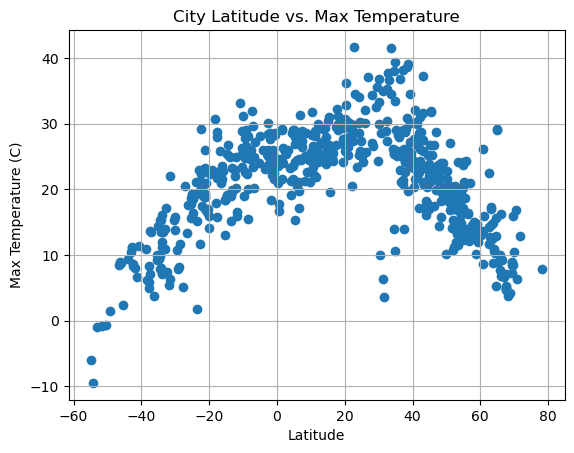

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

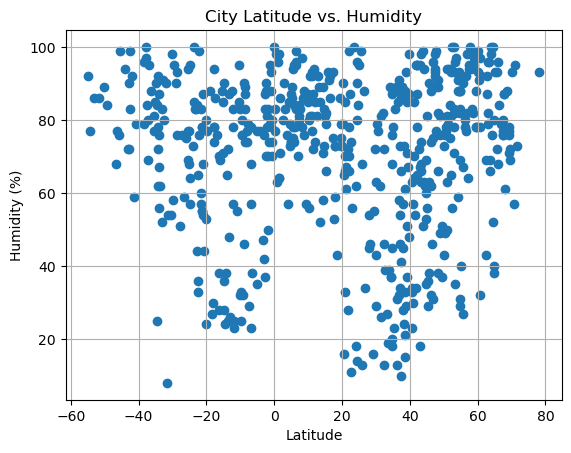

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

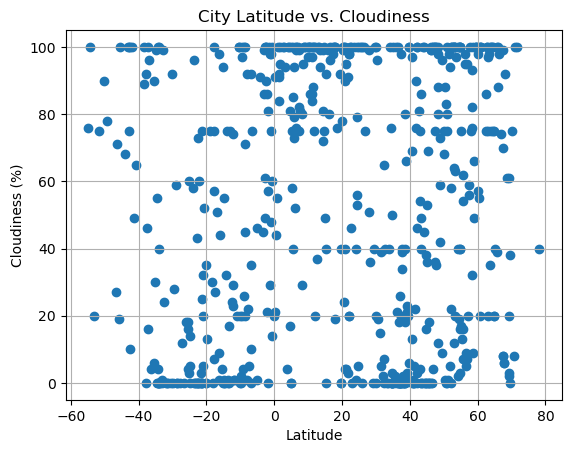

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

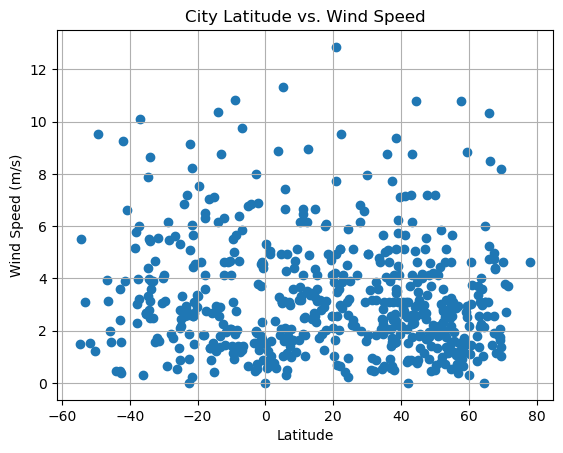

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

In [20]:
city_data_df.head(3)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.40,84,78,9.54,TF,1722895778
1,thunder bay,48.4001,-89.3168,23.99,38,100,4.12,CA,1722895249
2,murzuq,25.9155,13.9184,32.09,13,0,5.11,LY,1722895780


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def lin_regress(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    return ({"slope": slope,
             "intercept": intercept, 
             "rvalue": rvalue, 
             "pvalue": pvalue, 
             "stderr": stderr
             })


In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,thunder bay,48.4001,-89.3168,23.99,38,100,4.12,CA,1722895249
2,murzuq,25.9155,13.9184,32.09,13,0,5.11,LY,1722895780
6,la'ie,21.6477,-157.9253,30.00,72,91,3.58,US,1722895785
7,palikir - national government center,6.9248,158.1611,31.41,70,100,3.09,FM,1722895786
8,olyokminsk,60.3736,120.4264,13.38,91,55,1.12,RU,1722895787


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.40,84,78,9.54,TF,1722895778
3,papao,-17.7500,-149.5500,28.82,74,7,6.31,PF,1722895782
4,bredasdorp,-34.5322,20.0403,7.84,84,0,3.34,ZA,1722895783
5,adamstown,-25.0660,-130.1015,19.35,68,60,5.32,PN,1722895784
11,edinburgh of the seven seas,-37.0676,-12.3116,13.48,95,96,10.10,SH,1722895790


###  Temperature vs. Latitude Linear Regression Plot

In [24]:
# define function to plot linear regression graphs

def lingress_plot (x_values,y_values,rgres_values,x_label,y_label,chart_title):
    plt.scatter(x_values,y_values)
    plt.plot(x_values,rgres_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(chart_title)

The r^2 value is: 0.36558693489505345


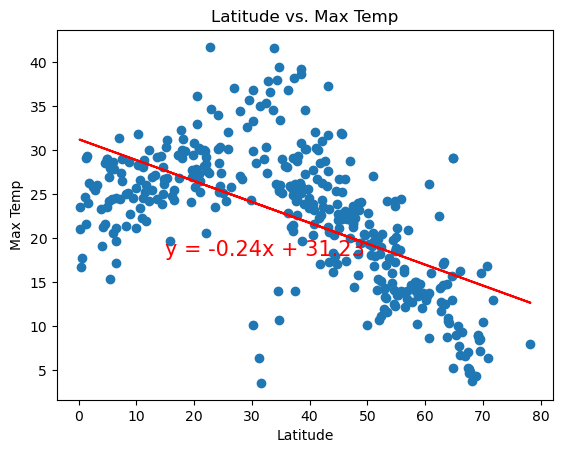

In [39]:
# Linear regression on Northern Hemisphere
regress_north = lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
regress_north_values = northern_hemi_df["Lat"] * regress_north["slope"] + regress_north["intercept"]

# Printing correlation coefficient
print (f'The r^2 value is: {regress_north["rvalue"]**2}')

# Equation of the line
north_line_eq = "y = " + str(round(regress_north["slope"],2)) + "x + " + str(round(regress_north["intercept"],2))

# Plotting the graph
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],regress_north_values,"r-")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Max Temp")
plt.text(15,18, north_line_eq, c='r',fontsize =15)

# Show plot
plt.show()

The r^2 value is: 0.7147964807392748


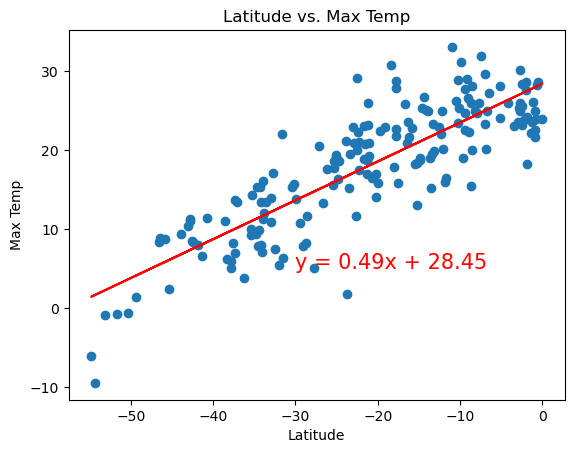

In [40]:
# Linear regression on Southern Hemisphere

regress_south = lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
regress_south_values = southern_hemi_df["Lat"] * regress_south["slope"] + regress_south["intercept"]

# Printing correlation coefficient
print (f'The r^2 value is: {regress_south["rvalue"]**2}')

# Equation of the line
south_maxtemp_eq = "y = " + str(round(regress_south["slope"],2)) + "x + " + str(round(regress_south["intercept"],2))

# Plotting linear regression graph
lingress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],regress_south_values,"Latitude","Max Temp","Latitude vs. Max Temp")
plt.text(-30,5, south_maxtemp_eq , c='r', fontsize=15)
plt.show()

**Discussion about the linear relationship:** The r square value for latitude and max temp in the southern hemisphere is about 0.7 which is indicative of a strong correlation and linear relationship between the two properties. However, in the northern hemisphere, the correlation coefficient is considerably lower at 0.4. This would indicate a weaker linear relationship bewteen the lattitude and max temp in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.00037985036906264583


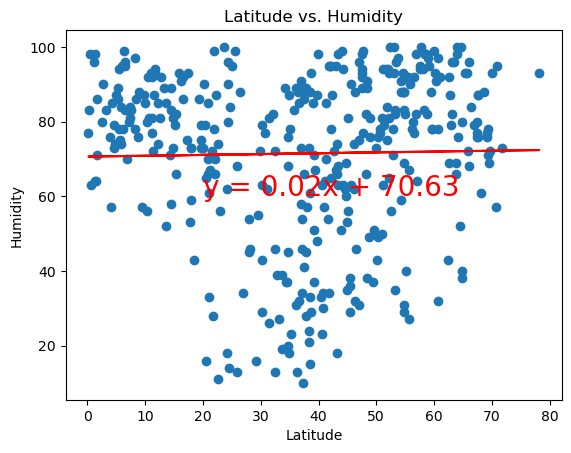

In [27]:
# Northern Hemisphere
regrshumid_north = lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
regrshumid_north_values = northern_hemi_df["Lat"] * regrshumid_north["slope"] + regrshumid_north["intercept"]

# Printing correlation coefficient
print (f'The r^2 value is: {regrshumid_north["rvalue"]**2}')

# Equation of the line
northhumid_line_eq = "y = " + str(round(regrshumid_north["slope"],2)) + "x + " + str(round(regrshumid_north["intercept"],2))

# Plotting linear regression graph
lingress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],regrshumid_north_values,"Latitude","Humidity","Latitude vs. Humidity")
plt.text(20,60, northhumid_line_eq, c='r',fontsize = 20)
plt.show()

The r^2 value is: 0.0516102304636109


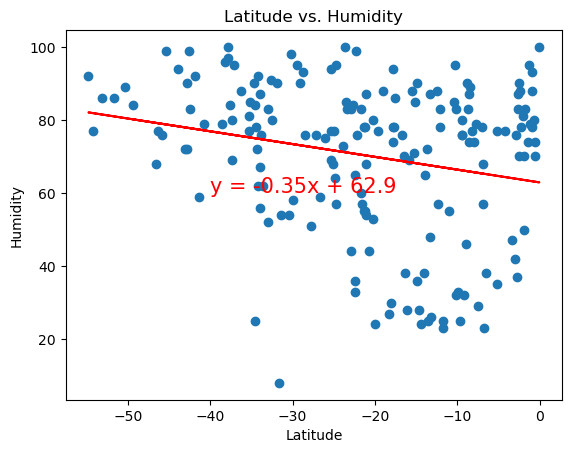

In [28]:
# Southern Hemisphere
regresshumid_south = lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
regresshumid_south_values = southern_hemi_df["Lat"] * regresshumid_south["slope"] + regresshumid_south["intercept"]

# Printing correlation coefficient
print (f'The r^2 value is: {regresshumid_south["rvalue"]**2}')

# Equation of the line
south_humid_eq = "y = " + str(round(regresshumid_south["slope"],2)) + "x + " + str(round(regresshumid_south["intercept"],2))

# Plotting linear regression graph
lingress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],regresshumid_south_values,"Latitude","Humidity","Latitude vs. Humidity")
plt.text(-40,60, south_humid_eq, c='r', fontsize=15)
plt.show()

**Discussion about the linear relationship:** The r square value for latitude and humidity, in the northern and southern hemisphere is 0 and 0.05 respectively. This would indicate that there is little to no correlation between lattitude and humidity and therefor no linear relationship between the two.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.02356177426041942


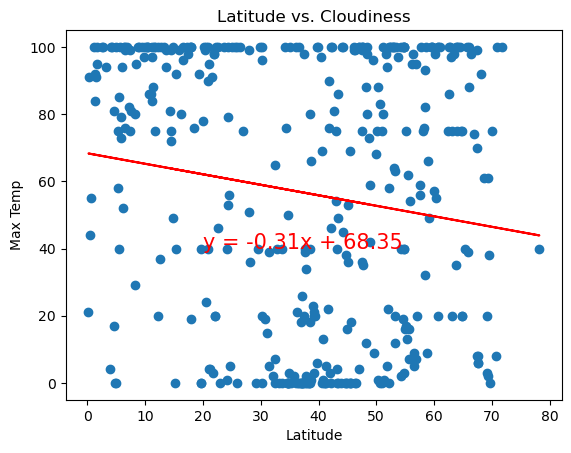

In [29]:
# Northern Hemisphere
regrscloud_north = lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
regrscloud_north_values = northern_hemi_df["Lat"] * regrscloud_north["slope"] + regrscloud_north["intercept"]

# Printing correlation coefficient
print (f'The r^2 value is: {regrscloud_north["rvalue"]**2}')

# Equation of the line
northcloud_line_eq = "y = " + str(round(regrscloud_north["slope"],2)) + "x + " + str(round(regrscloud_north["intercept"],2))

# Plotting linear regression graph
lingress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],regrscloud_north_values,"Latitude","Max Temp","Latitude vs. Cloudiness")
plt.text(20,40, northcloud_line_eq, c='r',fontsize = 15)
plt.show()

The r^2 value is: 1.9992846486156683e-06


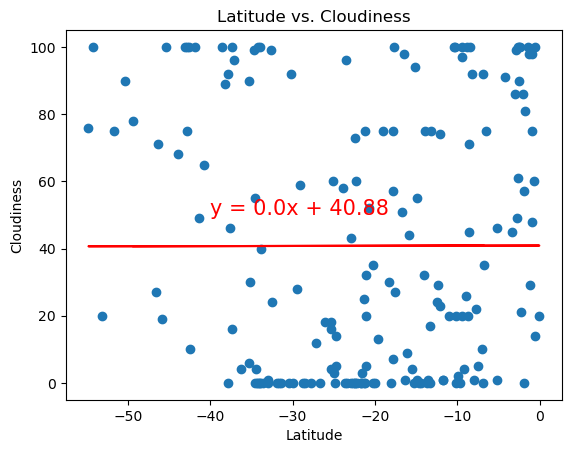

In [30]:
# Southern Hemisphere
regresscloud_south = lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
regresscloud_south_values = southern_hemi_df["Lat"] * regresscloud_south["slope"] + regresscloud_south["intercept"]

# Printing correlation coefficient
print (f'The r^2 value is: {regresscloud_south["rvalue"]**2}')

# Equation of the line
south_cloud_eq = "y = " + str(round(regresscloud_south["slope"],2)) + "x + " + str(round(regresscloud_south["intercept"],2))

# Plotting linear regression graph
lingress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],regresscloud_south_values,"Latitude","Cloudiness","Latitude vs. Cloudiness")
plt.text(-40,50, south_cloud_eq, c='r', fontsize=15)
plt.show()

**Discussion about the linear relationship:** The r square value for latitude and cloudiness, in both the northern and southern hemisphere, is very close to zero indicating that there is no correlation between lattitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.006111233687150877


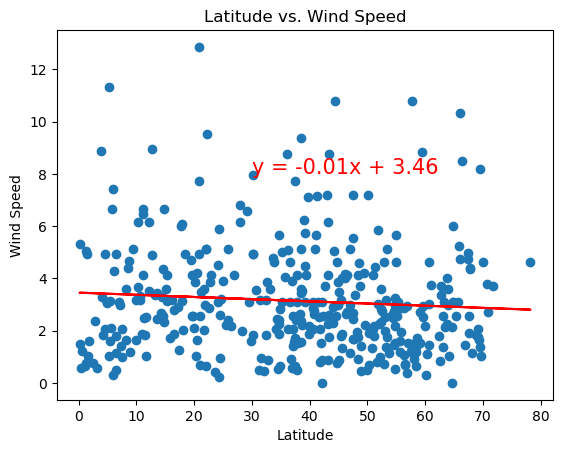

In [32]:
# Northern Hemisphere
regrsspeed_north = lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
regrsspeed_north_values = northern_hemi_df["Lat"] * regrsspeed_north["slope"] + regrsspeed_north["intercept"]

# Printing correlation coefficient
print (f'The r^2 value is: {regrsspeed_north["rvalue"]**2}')

# Equation of the line
northspeed_line_eq = "y = " + str(round(regrsspeed_north["slope"],2)) + "x + " + str(round(regrsspeed_north["intercept"],2))

# Plotting linear regression graph
lingress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],regrsspeed_north_values,"Latitude","Wind Speed","Latitude vs. Wind Speed")
plt.text(30,8, northspeed_line_eq, c='r',fontsize = 15)
plt.show()

The r^2 value is: 0.004761501442822818


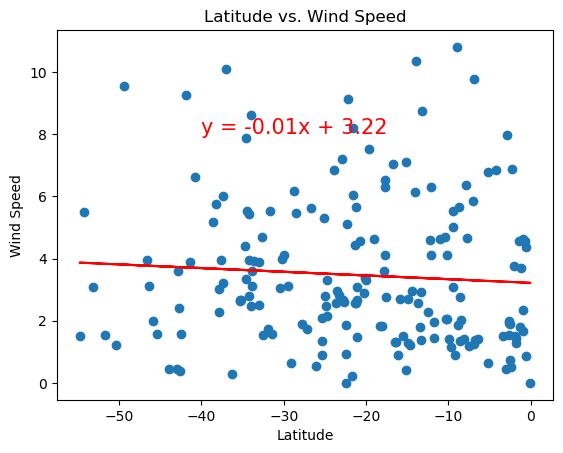

In [33]:
# Southern Hemisphere
regressspeed_south = lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
regressspeed_south_values = southern_hemi_df["Lat"] * regressspeed_south["slope"] + regressspeed_south["intercept"]

# Printing correlation coefficient
print (f'The r^2 value is: {regressspeed_south["rvalue"]**2}')

# Equation of the line
south_speed_eq = "y = " + str(round(regressspeed_south["slope"],2)) + "x + " + str(round(regressspeed_south["intercept"],2))

# Plotting linear regression graph
lingress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],regressspeed_south_values,"Latitude","Wind Speed","Latitude vs. Wind Speed")
plt.text(-40,8, south_speed_eq, c='r', fontsize=15)
plt.show()

**Discussion about the linear relationship:** The r square value for latitude and wind speed, in both the northern and southern hemisphere, is approximately zero indicating that there is no correlation between lattitude and wind speed